In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
from IPython.display import Image

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

response = requests.get(endpoint)

In [3]:
response

<Response [200]>

In [4]:
response.text

'[{"month_name":"January","year":"2014","query_count":"223","query_text":"ebid"}\n,{"month_name":"January","year":"2014","query_count":"112","query_text":"property maps"}\n,{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"January","year":"2014","query_count":"90","query_text":"property tax"}\n,{"month_name":"January","year":"2014","query_count":"76","query_text":"jobs"}\n,{"month_name":"January","year":"2014","query_count":"75","query_text":"employment"}\n,{"month_name":"January","year":"2014","query_count":"73","query_text":"human resources"}\n,{"month_name":"January","year":"2014","query_count":"62","query_text":"police"}\n,{"month_name":"January","year":"2014","query_count":"61","query_text":"criminal court clerk"}\n,{"month_name":"January","year":"2014","query_count":"53","query_text":"media releases"}\n,{"month_name":"January","year":"2014","query_count":"50","query_text":"property taxes"}\n,{"month_name":"January","year":"2014","query

In [5]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [6]:
type(res)

list

type(res)

Extract JSON from list (try index position) and convert into dictionary

In [7]:
len(res)

1000

In [8]:
res.keys()

AttributeError: 'list' object has no attribute 'keys'

In [9]:
res[999]

{'month_name': 'February',
 'year': '2014',
 'query_count': '7',
 'query_text': 'pay plan'}

In [10]:
type(res[999])

dict

# 1
Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

Endpoint filtering - https://dev.socrata.com/docs/filtering.html

In [11]:
endpoint_1 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire'
response = requests.get(endpoint_1)

In [12]:
response

<Response [200]>

In [13]:
response.text

'[{"month_name":"January","year":"2016","query_count":"19","query_text":"fire"}\n,{"month_name":"February","year":"2016","query_count":"35","query_text":"fire"}\n,{"month_name":"March","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"April","year":"2016","query_count":"26","query_text":"fire"}\n,{"month_name":"May","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"June","year":"2016","query_count":"31","query_text":"fire"}\n,{"month_name":"July","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}\n,{"month_name":"September","year":"2016","query_count":"36","query_text":"fire"}\n,{"month_name":"October","year":"2016","query_count":"38","query_text":"fire"}\n,{"month_name":"November","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"December","year":"2016","query_count":"38","query_text":"fire"}]\n'

In [14]:
fire = response.json()

In [15]:
fire

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [16]:
fire_dictionary = {}
for line in fire:
    count = int(line.get('query_count'))
    month = line.get('month_name')
    if month in fire_dictionary:
        fire_dictionary[month] += count
    else:
        fire_dictionary[month] = count
fire_dictionary

{'January': 19,
 'February': 35,
 'March': 32,
 'April': 26,
 'May': 24,
 'June': 31,
 'July': 24,
 'August': 47,
 'September': 36,
 'October': 38,
 'November': 32,
 'December': 38}

In [17]:
fire16_df = pd.DataFrame.from_dict(fire_dictionary, orient='index')
fire16_df = fire16_df.reset_index()
fire16_df.columns = ['month', 'searches']

In [18]:
fire16_df.head()

,month,searches
0,January,19
1,February,35
2,March,32
3,April,26
4,May,24


In [19]:
fire16_df.nlargest(1, 'searches')

,month,searches
7,August,47


# Answer - 1
August 2016 had the most searches for 'fire' with 47.

# 2
Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [20]:
endpoint_2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&$limit=50000'

response2 = requests.get(endpoint_2)

In [21]:
response2

<Response [200]>

In [22]:
#response2.text

In [23]:
q2 = response2.json()

In [24]:
len(q2)

1262

# Answer - 2
There were 1,262 occurences when a query was run more than 100 times in a month.

# 3
Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [25]:
endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&query_text=codes'

response3 = requests.get(endpoint3)

In [26]:
response3

<Response [200]>

In [27]:
q3 = response3.json()

In [28]:
q3

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'July',
  'month': '7',
  'year': '2021',
  'query_count': '114',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'

In [29]:
len(q3)

56

# Answer - 3
There were 56 times when 'codes' was searched more than 100 times in a month.

# 4
Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [30]:
endpoint4 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'
#no individual queries other than the limit required in the API documentation

response4 = requests.get(endpoint4)

In [31]:
response4

<Response [200]>

In [32]:
q4 = response4.json()

In [33]:
len(q4)

43677

In [34]:
q4

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [35]:
q4_df = pd.DataFrame.from_dict(q4)
q4_df.head()

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN


In [36]:
maps = q4_df[q4_df['query_text'] == 'maps']
maps.head()

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN


In [37]:
len(maps)

82

In [38]:
maps.dtypes

month_name     object
year           object
query_count    object
query_text     object
month          object
dtype: object

In [39]:
maps['query_count'] = pd.to_numeric(maps['query_count'])

C:\Users\cbrown\AppData\Local\Temp/ipykernel_17148/3038949682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps['query_count'] = pd.to_numeric(maps['query_count'])


In [40]:
maps.dtypes

month_name     object
year           object
query_count     int64
query_text     object
month          object
dtype: object

In [41]:
January = maps.loc[maps['month_name'] == 'January']
January.head(10)

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
6266,January,2015,119,maps,NaN
8001,January,2017,117,maps,NaN
12034,January,2016,104,maps,NaN
23686,January,2018,173,maps,NaN
28612,January,2019,160,maps,1
34508,January,2020,154,maps,1


In [42]:
jan_total = January['query_count'].sum()
print(jan_total)

924


map_totals = {}
for line in maps:
    count = int(line.get('query_count'))
    month = line.get('month_name')
    if month in map_totals:
        map_totals[month] += count
    else:
        map_totals[month] = count
map_totals

In [43]:
February = maps.loc[maps['month_name'] == 'February']
February.head(10)

,month_name,year,query_count,query_text,month
503,February,2014,140,maps,NaN
6717,February,2015,129,maps,NaN
12743,February,2016,130,maps,NaN
18292,February,2017,235,maps,NaN
29374,February,2019,98,maps,2
35518,February,2020,100,maps,2


In [44]:
feb_total = February['query_count'].sum()
print(feb_total)

832


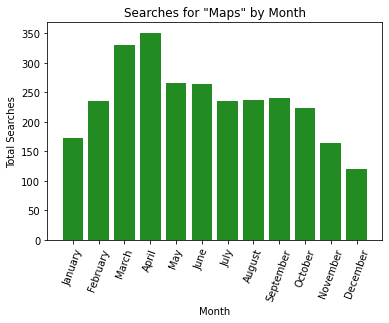

In [51]:
plt.bar(maps.month_name, maps.query_count, color='forestgreen') 
plt.xlabel('Month') 
plt.ylabel('Total Searches') 
plt.title('Searches for "Maps" by Month') 
plt.xticks(rotation = 70)
plt.ticklabel_format(style='plain', axis='y');
plt.show()

In [52]:
April = maps.loc[maps['month_name'] == 'April']

In [53]:
apr_total = April['query_count'].sum()
print(apr_total)

1309


In [54]:
#why does the sum of queries in April not align with the y axis of the visual?

# Answer - 4
April was the month with the highest number of searches for maps.